In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.utils import shuffle


In [110]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"  

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)


X = np.array(images).reshape(-1, 28*28)  
y = to_categorical(labels, num_classes=10)  

print(X.shape)  
print(y.shape)


(10160, 784)
(10160, 10)


In [111]:
X, y = shuffle(X, y, random_state=42)

In [112]:
model = Sequential([
    Dense(50, activation='relu', input_shape=(784,)),
    Dropout(0.001),
    Dense(10,activation='softmax'),
])

In [113]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history_adam=model.fit(X,y,epochs=20,validation_split=0.2)

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2622 - loss: 2.1821 - val_accuracy: 0.7151 - val_loss: 1.4242
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7430 - loss: 1.3034 - val_accuracy: 0.8494 - val_loss: 0.9466
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.8980 - val_accuracy: 0.8799 - val_loss: 0.6798
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.6717 - val_accuracy: 0.8976 - val_loss: 0.5367
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.5337 - val_accuracy: 0.9124 - val_loss: 0.4453
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9019 - loss: 0.4640 - val_accuracy: 0.9178 - val_loss: 0.3847
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.4018 - val_accuracy: 0.9193 - val_loss: 0.3459
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9183 - loss: 0.3664 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss Comparision')

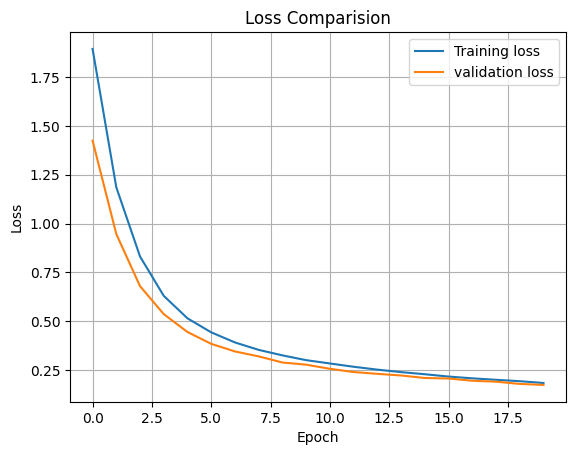

In [114]:
plt.plot(history_adam.history['loss'],label='Training loss')
plt.plot(history_adam.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Loss Comparision')

Text(0.5, 1.0, 'Accuracy Comparison')

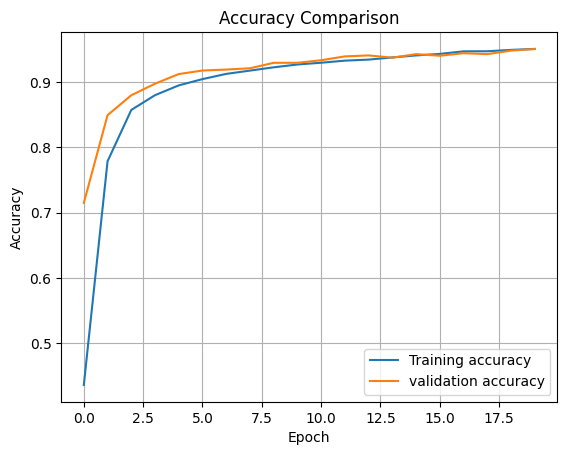

In [115]:
plt.plot(history_adam.history['accuracy'],label='Training accuracy')
plt.plot(history_adam.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title('Accuracy Comparison') 